In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [9]:
df = pd.read_csv('../Dataset/Shanghai.csv', parse_dates=['Date'], index_col='Date')
# df = df.set_index('Date')
# df = df.reset_index()
# df = df.set_index('Date')
# df = df.drop('Adj Close', axis=1)

Available Stocks : 
SYNOPEC_CORP
CITIC
SANY
CMB
PDH
CHINA_UNICOM
CSSC_HOLDINGS
HENGRUI_PHARMA
WANHUA
NARI_TECH
TONGWEI
KWEICHOW_MOUTAI
HAIER_SMART_HOME
SHANXI_FEN_WINE
YILI
CYPC
LONGI
CSEC
INDUSTRIAL_BANK
SHCI
AGRICULTURAL_BANK_OF_CHINA
PING_AN
BANKCOMM
CHINA_RAILWAY
ICBC


Enter the stock name:  china_railway


You selected: CHINA_RAILWAY


C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\soham\AppData\Roaming\Python\Python312

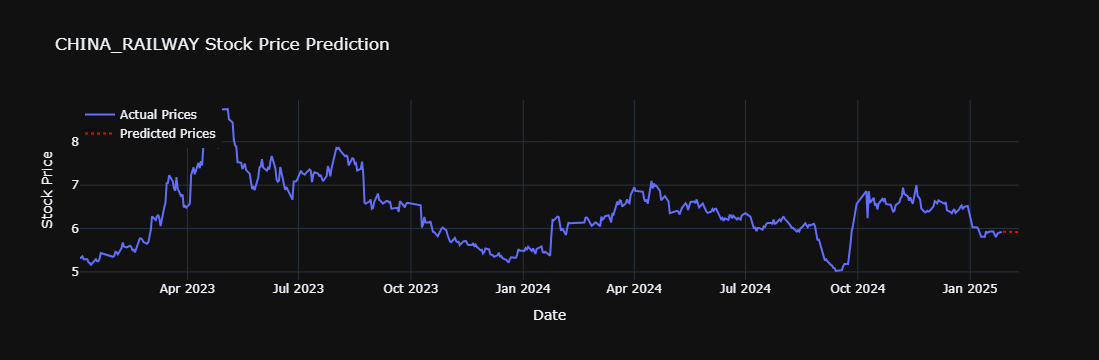

    Values 
0  5.924232
1  5.925928
2  5.924008
3  5.922738
4  5.922202
5  5.922016
6  5.921986
7  5.922049
8  5.922086
9  5.922102


In [10]:
stock_list = ["SYNOPEC_CORP", "CITIC", "SANY", "CMB", "PDH", "CHINA_UNICOM", "CSSC_HOLDINGS", "HENGRUI_PHARMA", "WANHUA", "NARI_TECH", 
"TONGWEI", "KWEICHOW_MOUTAI", "HAIER_SMART_HOME", "SHANXI_FEN_WINE", "YILI", "CYPC", "LONGI", 
"CSEC", "INDUSTRIAL_BANK", "SHCI", "AGRICULTURAL_BANK_OF_CHINA", "PING_AN", "BANKCOMM", "CHINA_RAILWAY", "ICBC"]

print("Available Stocks : ")
for stocks in stock_list:
    print(stocks)

while True:
    user_input = input("Enter the stock name: ").strip().upper()
    if user_input in stock_list:
        print(f"You selected: {user_input}")
        break
    else:
        print("Invalid selection. Please enter a valid stock name.")


# df = df.reset_index()
x = df[df["Symbol"] == user_input]
x = x.drop('Symbol', axis = 1)

# step1:- preprocessing
x = x[['Close']]
x.dropna(inplace=True)
x['Returns'] = x['Close'].pct_change()

#step 2:
def check_stat(timeseries):
    result = adfuller(timeseries.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")

    if result[1] <= 0.05:
        print("The Series is Stationary")
        # model = ARIMA(x['Close'], order=(5,0,0))
    else:
        x['Close_Diff'] = x['Close'].diff().dropna()
        # model = ARIMA(x['Close'], order=(5,1,0))


# step 5:- Fit ARIMA model (p,d,q) parameters
model = ARIMA(x['Close'], order=(5,1,0))
model_fit = model.fit()

# prediction
forecast = model_fit.forecast(steps=10)
dates = pd.date_range(start=x.index[-1], periods=11, freq='B')[1:]

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=x.index, y=x['Close'], mode='lines', name='Actual Prices'))
fig.add_trace(go.Scatter(x=dates, y=forecast, mode='lines', name='Predicted Prices', 
                         line=dict(dash='dot', color='red')))

fig.update_layout(title=f"{user_input} Stock Price Prediction",
                  xaxis_title='Date', yaxis_title='Stock Price',
                  template="plotly_dark",
                  legend=dict(x=0, y=1))

fig.show()
predict = pd.DataFrame({'Values ': forecast}).reset_index()
predict = predict.drop('index', axis=1)
print(predict)